In [253]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [254]:
rest = pd.read_csv('/Volumes/Database/Research/ozone-budget/result_df_UKESM1_3_0_NN_width_64_dropout_0.1_90.csv')
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(1217).csv')

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [255]:
rest['tas'] = data['tas']
rest['pan'] = data['pan']
rest['photo1d'] = data['photo1d']

rest['o3_mole'] = rest['o3']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['no_mole'] = rest['no']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['no2_mole'] = rest['no2']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['oh_mole'] = rest['oh']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['h2o_mole'] = rest['h2o']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['hno3_mole'] = rest['hno3']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['pan_mole'] = rest['pan']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)

rest['ho2_mole'] = rest['HO₂']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['ch3o2_mole'] = rest['CH₃O₂']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)

rest['k_ho2_ho2'] = 3.0*10**(-13)*np.exp(-460/rest['tas'])
rest['k_no_ho2'] = data['k_no_ho2']
rest['k_no_ch3o2'] = data['k_no_ch3o2']
rest['k_o1d_h2o'] = data['k_o1d_h2o']
rest['k_o3_ho2'] = data['k_o3_ho2']
rest['k_o3_oh'] = data['k_o3_oh']

### A proportion (${\lambda}$) of the O(${^1}$D) formed by the photolysis of O${_3}$ reacts with H${_2}$O to form 2 OH radicals. Here we can estimate the ${\lambda}$ based on steady-state assumption. 

In [270]:
rest['lambda'] = (2*rest['ho2_mole']**2*rest['k_ho2_ho2']+3.3*10**(-12)*rest['oh_mole']*rest['no2_mole'])/rest['photo1d']/rest['o3_mole']/2
#rest.replace([np.inf, -np.inf], 0, inplace=True)

In [271]:
rest

,HO₂,CH₃O₂,kₓROₓ,O¹D,kₐalkenes,PO₃̂,LO₃̂,longitude,latitude,t,...,oh_mole,h2o_mole,hno3_mole,pan_mole,ho2_mole,ch3o2_mole,k_ho2_ho2,lambda,country,loc
0,7.280630e-12,4.660699e-11,2.658377e-28,9.069226e-22,3.638301e-28,52922.427962,55050.156165,1.0,-89.0,1.0,...,651999.769267,1.715251e+16,1.441512e+08,5.728714e+08,2.140922e+08,1.370512e+09,4.749660e-14,0.000538,南极地区,911.0
1,7.281262e-12,4.661300e-11,2.658434e-28,9.071393e-22,3.638602e-28,52965.764285,54871.991745,3.0,-89.0,1.0,...,651835.798159,1.708041e+16,1.446290e+08,5.731662e+08,2.141412e+08,1.370884e+09,4.748418e-14,0.000538,南极地区,2911.0
2,7.261796e-12,4.650557e-11,2.651481e-28,9.122343e-22,3.619068e-28,52870.091914,54895.091728,5.0,-89.0,1.0,...,651739.377844,1.700524e+16,1.451424e+08,5.734841e+08,2.135954e+08,1.367895e+09,4.747323e-14,0.000534,南极地区,4911.0
3,7.261786e-12,4.651602e-11,2.652178e-28,9.121947e-22,3.614559e-28,52937.939253,54734.487253,7.0,-89.0,1.0,...,652853.684618,1.693020e+16,1.466400e+08,5.742442e+08,2.136102e+08,1.368299e+09,4.746703e-14,0.000533,南极地区,6911.0
4,7.261663e-12,4.652939e-11,2.652065e-28,9.120833e-22,3.616232e-28,52988.650057,54586.117915,9.0,-89.0,1.0,...,652874.634956,1.686999e+16,1.478847e+08,5.748282e+08,2.136306e+08,1.368847e+09,4.745719e-14,0.000533,南极地区,8911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,1.387260e-14,8.797916e-14,2.047809e-31,7.619175e-25,8.489538e-31,134.963316,40.906482,-9.0,89.0,60.0,...,129.623633,1.501752e+16,5.515611e+09,1.858374e+09,4.196995e+05,2.661708e+06,4.503763e-14,inf,NaN,-8911.0
971996,1.259138e-14,8.829640e-14,1.989219e-31,9.184654e-25,1.161733e-30,80.140742,50.120315,-7.0,89.0,60.0,...,128.845362,1.497279e+16,5.516361e+09,1.859839e+09,3.809160e+05,2.671153e+06,4.504251e-14,inf,NaN,-6911.0
971997,1.375304e-14,9.701694e-14,2.127389e-31,9.824132e-25,1.220742e-30,49.788435,53.173863,-5.0,89.0,60.0,...,127.669524,1.492320e+16,5.518089e+09,1.861512e+09,4.160313e+05,2.934776e+06,4.504812e-14,inf,NaN,-4911.0
971998,1.362856e-14,9.592115e-14,2.115101e-31,9.784521e-25,1.211627e-30,70.603743,52.861757,-3.0,89.0,60.0,...,132.505269,1.487323e+16,5.519136e+09,1.862572e+09,4.122546e+05,2.901550e+06,4.505042e-14,inf,NaN,-2911.0


### Map the geographical distribution of the ${\lambda}$

In [258]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
rest = rest.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
rest = rest.drop(['province','state'], axis=1)

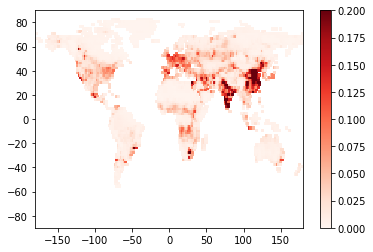

In [272]:
rest['loc'] = rest['longitude']*1000 + rest['latitude']
rest_land = rest.dropna()
rest_land = rest_land[rest_land['latitude'] >= -60]
rest_lambda = rest_land[rest_land['lambda'] < 1]
rest_map = rest_lambda.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = rest_map['longitude']
y = rest_map['latitude']
z = rest_map['lambda']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.2, s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [273]:
rest_lambda['lambda'].describe()

count    226536.000000
mean          0.027195
std           0.048849
min           0.000035
25%           0.003345
50%           0.007474
75%           0.029191
max           0.942233
Name: lambda, dtype: float64